# Utilities 

Imports commonly used libraries and other helpful functions


In [11]:
#Imports Libraries 

# complex networks package - guide https://networkx.org/ 
import networkx as nx

import cvxpy as cp
import pypower as pypower
# visualization packages - https://matplotlib.org/ 
import matplotlib.pyplot as plt
%matplotlib inline
from networkx.drawing.nx_agraph import graphviz_layout

# n-dinsional array tool - https://numpy.org/ 
import numpy as np

#import pygraphviz

import matplotlib.colors as mcolors

import scipy as sc

from scipy.io import mmread

from typing import Iterable
# for Notebook
%matplotlib inline

In [2]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    
    plt.axis('off')
    plt.show()

# Question 1

SIR Models

## Graph Ingesting 


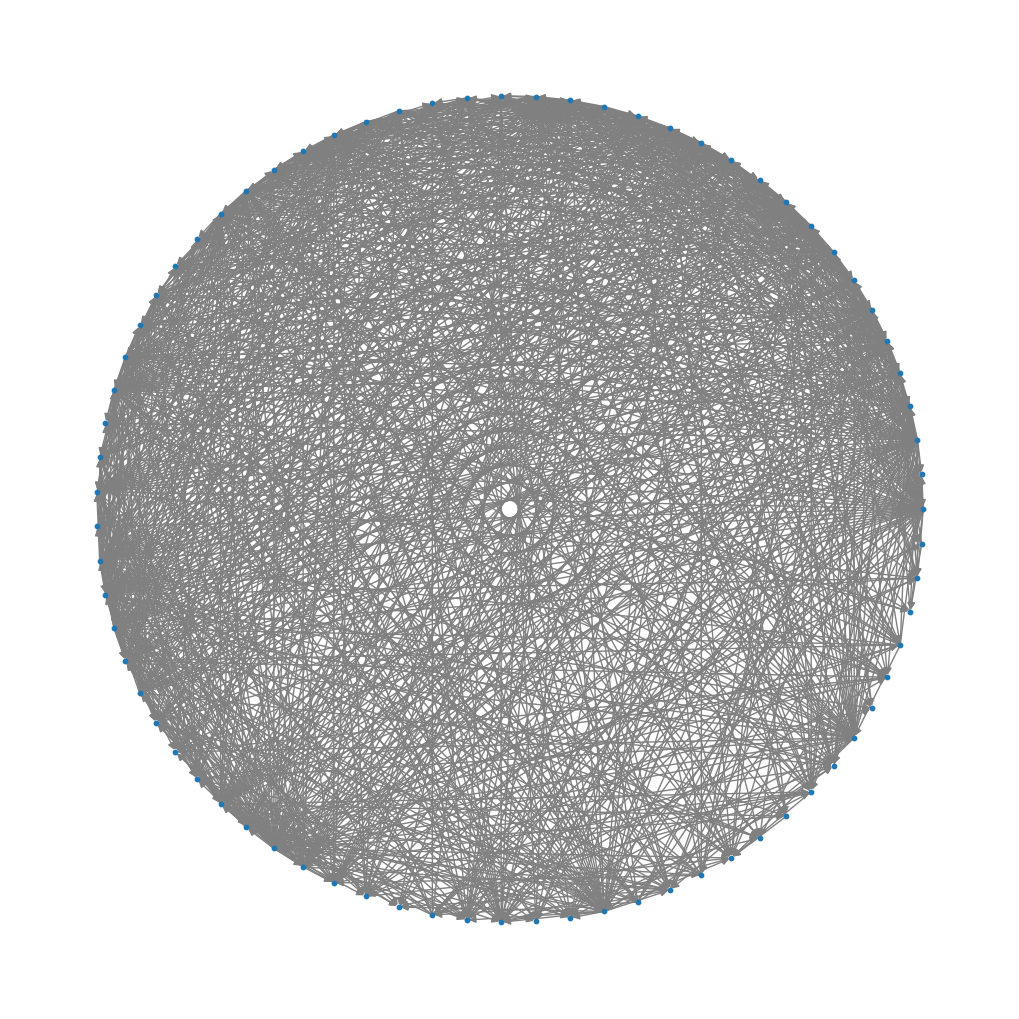

In [3]:
G1 = nx.read_edgelist(path = "hospital_edge-1.txt", create_using=nx.DiGraph()) #Ingests the graph from the hospital txt file 
plt.figure(figsize = (10,10)) #Creates the figure
nx.draw_circular(G1,with_labels = False, node_size =10, edge_color = "grey") #Adds the graph to the figure
plt.show() #Shows the figure 

## SIR Simulation 

Finding the finite difference method to calculate the evolution of the probability of infection

In [9]:
def SIR_Sim(G, Beta, Gamma):
        """
        Description: Usese the finite difference method to calculate the finite difference
        the evolution of the probability of infection. This

        Using the following formula:
        \dot{x}_i(t) = \frac{x_i(t+1)-x_i(t)}{dt} = \sigma_{j \in N_i}\frac{\Beta}{di}(1-x_i())x_j(t)-\gamma(x_i(t))
                = \frac{\Beta}{d_i}(1-x_i(t))\sigma_{j \in N_i}x_j(t)- \gamma(x_i(t))

        Notes: 
        d_i is the degree of node i 
        x_i(0) = 1 for some i chosen uniformly
        x_j = 0 for all other nodes
        We randomly choose an infected node to begin the process 
        d_t is the set to equal to 1 

        Args:
        G: undirected graph G
        Beta: float values greater than 0.0
        Gamma: float values greater than 0.0

        Output:
        res: list of values over time given the infection rate
    """
        #Common defintitions  
        nodes = len(G.nodes) #Nodes of G
        degree = [d for _, d in G.degree()] #Degree of nodes in G

        def probability(Time, Node, Stage, Beta, Gamma):
            """
        Description: Usese the finite difference method to calculate the finite difference
        the evolution of the probability of infection. This

        Using the following formula:
        \dot{x}_i(t) = \frac{x_i(t+1)-x_i(t)}{dt} = \sigma_{j \in N_i}\frac{\Beta}{di}(1-x_i())x_j(t)-\gamma(x_i(t))
                = \frac{\Beta}{d_i}(1-x_i(t))\sigma_{j \in N_i}x_j(t)- \gamma(x_i(t))

        Notes: 
        d_i is the degree of node i 
        x_i(0) = 1 for some i chosen uniformly
        x_j = 0 for all other nodes
        We randomly choose an infected node to begin the process 
        d_t is the set to equal to 1 

        Args:
        G: undirected graph G
        Beta: float values greater than 0.0
        Gamma: float values greater than 0.0

        Output:
        res: list of values over time given the infection rate
            """
            pt1 = (Beta / degree[Node]) * (1-Time[Stage -1][Node])
            pt2 = np.sum([Time[Stage-1][i] for i in nx.neighbors(G,Node)])
            return pt1 * pt2 - Gamma *Time[Stage-1][Node]

        def simulation():
            """
        Description: Usese the finite difference method to calculate the finite difference
        the evolution of the probability of infection. This

        Using the following formula:
        \dot{x}_i(t) = \frac{x_i(t+1)-x_i(t)}{dt} = \sigma_{j \in N_i}\frac{\Beta}{di}(1-x_i())x_j(t)-\gamma(x_i(t))
                = \frac{\Beta}{d_i}(1-x_i(t))\sigma_{j \in N_i}x_j(t)- \gamma(x_i(t))

        Notes: 
        d_i is the degree of node i 
        x_i(0) = 1 for some i chosen uniformly
        x_j = 0 for all other nodes
        We randomly choose an infected node to begin the process 
        d_t is the set to equal to 1 

        Args:
        G: undirected graph G
        Beta: float values greater than 0.0
        Gamma: float values greater than 0.0

        Output:
        res: list of values over time given the infection rate
            """
            Time_States = np.empty((G,nodes))
            initial_infect = np.random.choice(range(nodes))
            Time_States[0][initial_infect] = 1
            for step in range(1,65):
                for i in range(V):
                    Time_States[step][i] = probability(Time_States, i, step, Beta, Gamma)
            res = np.transpose(Time_States)
            return res
         

In [28]:
#Creates a list of beta values to be tried in the simulation models
beta_list = [0.2, 0.5, 0.9]

plt.figure(figsize = (10,10)) #Creates the figure
for i in beta_list:
    for k in range(len(list(G1.nodes()))):
        x = SIR_Sim(G1, i, 0.1)
        plt.plot(x[k,:]) #Adds the plots to the figures 

TypeError: 'NoneType' object is not subscriptable

<Figure size 720x720 with 0 Axes>

## SI Simulation

In [ ]:
"""
Description:

Notes: 

Args:

Output:
"""

def SI_model(V, beta): 
    time_states = np.zeros((65,V)) 
    time_states[0][0] = 1 
    num_infected = np.zeros(65) 
    for step in range(1,65):
        for i in range(V):
            if np.random.uniform(0,1) < Beta:
                nb = np.random.choice([nb for nb in nx.neighbors(G,i)])
                time_states[step][i] = (1-time_states[step-1][i]) * time_states[ else: time_states[step][i] = time_states[step-1][i]
    num_infected[step] = np.sum(time_states[step]) tr = np.transpose(time_states)
    return tr, num_infected

In [ ]:
#Creates a list of beta values to be tried in the simulation models
beta_list = [0.2,0.5, 0.9]

#Calls the SIR Simulation Function 
for i in beta_list:
    SI_Sim(G1, i)

# Question 2

Hengselmann-Krause bounded confidence model

## Ingesting the data

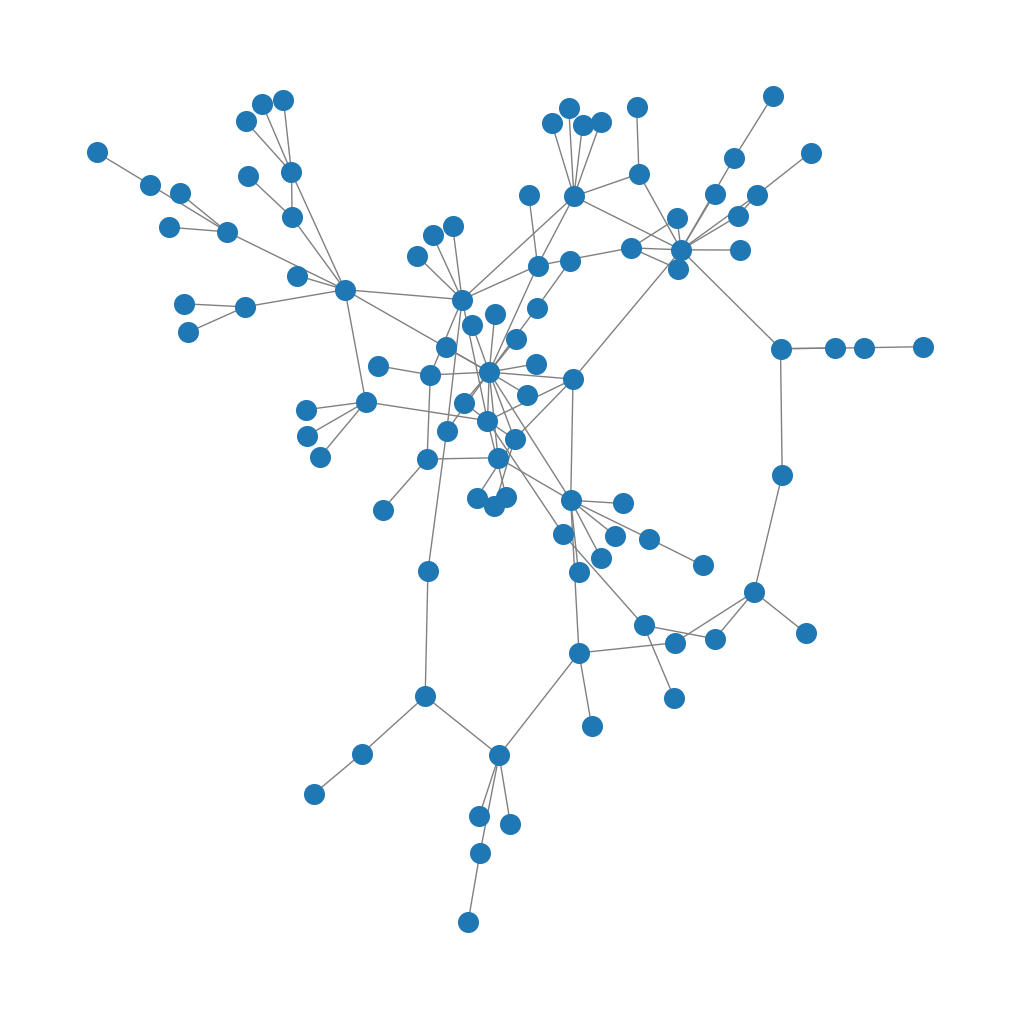

In [12]:
G2 = nx.read_edgelist('rt-retweet.mtx')# Load data here
plt.figure(figsize = (10,10)) #Creates the figure 
nx.draw(G2, node_size = 200 , edge_color = "grey") #draw initial graph 
plt.show() #Shows the figure 

## Simulating the Confidence Model

In [13]:
def HK(G,Tau, Time):
    """
    Description: Creates the Helgsemann-Krause in python. 

    Using the following formula:
        [INSERT FORMULA]

    Notes: 
        
    Args:
        G: undirected graph G
        Tau: float value ranging from 0.0 to 1.0
        Time: integer value for the number of epochs

    Output:
        x: list of values as time goes on according to the HK Model 
    """
    #Find max degree
    def d_alpha(G):
        """
        Description: Finds the alpha value for the graph (G) 

        Using the following formula:
            \alpha = 0.5/(max_i(di))

        Notes: 
            max_i: the maximum degree value in graph G

        Args:
            G: undirected graph G
            

        Output:
            alpha: alpha value for the graph 
        """
        MAX_DEG = max(d for _, d in G2.degree()) #Gets the degrees of graph G and then picks the max
        alpha = 0.5 / MAX_DEG #Arthimatic for alpha
        return alpha

    
    #Common defintions 
    nodes = list(G2.nodes) #Finds the node list of G
    n = len(nodes) #Finds the numeber of nodes in G from the node list 

    def L_RW(G):
        """
        Description: Finds the random walk laplacian for the graph (G) 

        Using the following formula:
           [INSERT FORMULA]

        Args:
            G: undirected graph G
            n: number of nodes in graph G
        Output:
            L: the random walk laplacian matrix for graph G
        """
        L = np.zeros((n, n))
        for l in range(n):
            for m in range(n):
                if l == m:
                    L[l][m] = 1
                elif G.has_edge(nodes[l], nodes[m]) == True:
                    L[l][m] = -1/G.degree(nodes[l])
        return L 


    w = np.multiply((1-d_alpha(G)),np.identity(n)) - np.multiply(d_alpha(G),L_RW(G)) #Finds the mixing matrix 
    x = np.empty((n, Time)) #Creates an empty n x time matrix 
    x[:,0] = np.random.uniform(0, 1, n) #Creates an intial vector and puts it into the first column of x 


    #HK Confidence
    for t in range(1,Time):
        for i in range(n):
            sum1 = 0 #Sum for the numerator
            sum2 = 0 #Sum for the denominator
            x_i = x[i, t-1] #Gets the previous state of x_i
            for j in range(n): 
                x_j = x[j][t-1] #Defines x_j similarly to x_i
                d_ij = np.abs(x_i - x_j) #Finds the absolute value of x_i and x_j
                u = 1 if d_ij <= Tau else 0 #U function 
                sum1 += w[i ,j] * u * x_j #Adds to the numerator sum 
                sum2 += w[i ,j] * u #Adds to the denominator sum 
            x[i,t]= (sum1 / sum2)
            
    plt.figure(figsize = (10,10)) #Creates the figure
    for k in range(len(list(G2.nodes()))): #Range for the graph 
        plt.plot(x[k,:]) #Adds the plots to the figures 
    return(plt.show())

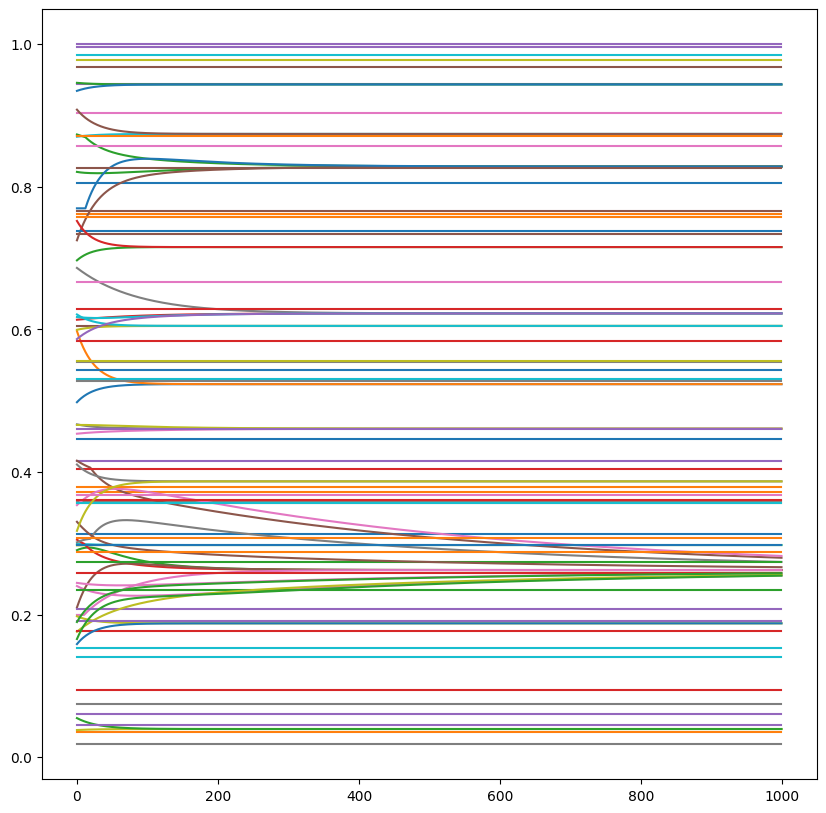

In [16]:
HK(G2,0.1,1000) #With Tau value of 0.1

In [14]:
HK(G2,0.5,20000) #With Tau value of 0.5

KeyboardInterrupt: 

# Question 3 

Electric Grid Simulation 

## Ingesting the data

In [36]:
import scipy.io
import pypower
mat = scipy.io.loadmat('ieee30.mat') #Imports the data
Bbus = mat['Bbus'] #Splits the data for Bbus
Ybus = mat['Ybus'] #Splits the data for Ybus
sinj = mat['sinj'] #Splits the data for sinj
vp = mat['vp'] #Splits the data for vp


## Apparent Power Generations

In [37]:
i = Ybus @ vp #Caclulate i 
s =vp * np.conjugate(i) #calculates s as the product of vp and the conjugate of i

p= np.real([i for i in s[1:]]) #Finds p 

p[0] #Shows the first element in p

array([0.33701853])

## DC Power Flow

### Calculate the active (real) power injections

### Compute Voltage Angles

In [38]:
bus = Bbus[1:, 1:] #Gets rid of the first row and column of Bbus 
B_inv = np.linalg.inv(bus.todense()) #Inverts B 
thetas = B_inv.dot(p) #Finds Thetas
thetas #Shows thetas 

matrix([[-0.01179141],
        [-0.03615565],
        [-0.04280736],
        [-0.03987319],
        [-0.04971496],
        [-0.05672225],
        [-0.05909629],
        [-0.06616823],
        [-0.07478661],
        [-0.06616823],
        [-0.06882027],
        [-0.04613998],
        [-0.08012415],
        [-0.07641945],
        [-0.07844424],
        [-0.08093702],
        [-0.09133306],
        [-0.09598565],
        [-0.09184089],
        [-0.07173995],
        [-0.06736948],
        [-0.05444798],
        [-0.06006725],
        [-0.02483785],
        [-0.03813785],
        [ 0.00493087],
        [-0.04600291],
        [-0.02044056],
        [-0.03682424]])

## Optimal Power Flow

See the rest of question three in the google colab 